# 1. Acquiring the data:

In [748]:
import numpy as np
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
cf.go_offline()

def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

In [749]:
responses=pd.read_excel("responses.xlsx")

*Age_Range* --> string : the range of participant's age 

*All Tests* --> string : did the participant complete his matriculation tests

*Last_Test* --> string : A range of time describing when was the last test 

*Is_Academic* --> string : is the participant an academic student now or has ever was. 

*Intensity* --> float : an answer describing how much does the participant consider his efforts during the exam's period in HS*

*English_Accomplish* --> float : on a scale from 1-5, how did the participant consider his accomplishments in English in HS

*Hebrew_Accomplish* --> float : on a scale from 1-5, how did the participant consider his accomplishments in Hebrew in HS

*Math_Accomplish* --> float : on a scale from 1-5, how did the participant consider his accomplishments in Math in Hs

*Civil* --> float : the amount of democratic principals the participant remembered. 

*Lit_1* --> float :  the amount of litteriture pieces the participant remembered. 

*Lit_2* --> float :  the amount of the main conflicts from those litteriture pieces that the participant remembered.  

*History* --> string : the subjects/ topic that the participant remembers that were taught. described as a list.

*Math_Level* --> float : the Math level of the participant in HS 

*Math_Level3* --> float : If the participant's Math level was 3:  the sense of capability  in solving this Math question.

*Math_Level4_5* --> float : If the participant's Math level was 4 or 5 :  the sense of capability  in solving this Math question. 

*HS= High School


In [750]:
responses

,Age_Range,All Tests,Last_Test,Is_Academic,Intensity,English_Accomplish,Hebrew_Accomplish,Math_Accomplish,Civil,Lit_1,Lit_2,History,Math_Level,Math_Level3,Math_Level4_5
0,23-28,Yes,5-10,yes,10.0,4.0,3.0,4.0,0.0,3.0,0.0,השואה,3.0,4.0,NaN
1,23-28,Yes,5-10,yes,8.0,5.0,4.0,4.0,3.0,4.0,2.0,"מלחמת העולם השניה, הקמת המדינה, עליות למדינה, ...",4.0,NaN,4.0
2,20-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23-28,Yes,5-10,yes,10.0,4.0,3.0,3.0,0.0,0.0,0.0,NaN,3.0,5.0,NaN
4,23-28,Yes,5-10,yes,6.0,5.0,3.0,3.0,2.0,3.0,2.0,"גרמניה הנאצית, מלחמת העולם השניה, האימפריה העו...",3.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,18-20,Yes,1-3,NaN,7.0,5.0,3.0,4.0,1.0,2.0,2.0,NaN,5.0,NaN,1.0
95,18-20,Yes,5-10,yes,7.0,4.0,3.0,2.0,1.0,3.0,2.0,"יהדות בגדד, מלחמת העולם השנייה, מלחמת העולם הר...",3.0,4.0,NaN
96,18-20,Yes,1-3,NaN,7.0,3.0,5.0,4.0,5.0,8.0,4.0,"לאום,לאומיות,דמוקרטיה,",5.0,NaN,3.0
97,18-20,Yes,1-3,NaN,10.0,5.0,2.0,3.0,2.0,10.0,8.0,NaN,3.0,2.0,NaN


In [751]:
responses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age_Range           99 non-null     object 
 1   All Tests           84 non-null     object 
 2   Last_Test           84 non-null     object 
 3   Is_Academic         51 non-null     object 
 4   Intensity           84 non-null     float64
 5   English_Accomplish  84 non-null     float64
 6   Hebrew_Accomplish   84 non-null     float64
 7   Math_Accomplish     84 non-null     float64
 8   Civil               84 non-null     float64
 9   Lit_1               83 non-null     float64
 10  Lit_2               84 non-null     float64
 11  History             58 non-null     object 
 12  Math_Level          84 non-null     float64
 13  Math_Level3         22 non-null     float64
 14  Math_Level4_5       62 non-null     float64
dtypes: float64(10), object(5)
memory usage: 11.7+ KB


# 2. Cleaning the data:

not all of the 99 responses are valid.
we need to keep only responses from those participants whose ages are 18-20 or 23-28. 

In [752]:
responses['Age_Range'].value_counts()

18-20    51
23-28    41
20-23     7
Name: Age_Range, dtype: int64

In [753]:
responses=responses.loc[(responses['Age_Range']=='18-20') | ((responses['Age_Range']=='23-28'))]

Now, we need to filter those who didn't finish their examns. let's check responses['All Tests']

In [754]:
len(responses)

92

so we have now 92 responses

In [755]:
responses['All Tests'].value_counts()

Yes    84
Name: All Tests, dtype: int64

but only 84 are valid

In [756]:
responses.loc[67,'All Tests']

nan

we have nan values. 

In [757]:
responses['All Tests'].isna()

0     False
1     False
3     False
4     False
5     False
      ...  
94    False
95    False
96    False
97    False
98    False
Name: All Tests, Length: 92, dtype: bool

In [758]:
responses.drop(list(responses[responses['All Tests'].isna()].index),axis=0,inplace=True)

In [759]:
len(responses)

84

now we are down to 84 valid responses

let's check that no one has done their last test in the last 3 month. 

In [760]:
responses['Last_Test'].value_counts()

5-10                38
1-3                 29
3-5                 10
3 month - 1 year     7
Name: Last_Test, dtype: int64

FINAL STEP, LET'S REORGANIZE THE INDEX

In [761]:
responses.reset_index(drop=True,inplace=True)

# 3. Determine the Individual Memory Quality Score

Each participant was given an individual Memory Quality Score (MQS) based of his memory test answers.
whereas X represents the score for each category, this is how the MQS was calculated
Each category's score is 25% of the MQS

    A. Civil Studies: x*100/6 (6 is the maximun score, so if x=6, this category's score is 100)

    B.Litterature Studies:  B1) 10% for the first question
                            B2)15% for the second one.
    for each question the score is X*10. (so if the subject remembered 5 pieces of litterature  out of 10, the score will be 50.
    
    C. History Studies: X*100/6 ( 6 was the maximun answer given in this exam, so in fact the highest number of topics one was able to recollect out of 99 responders
    
    D. Math Studies: X*100/5 (if the answer was 5, than the score is 100 for this category)

   ##### MQS= 0.25 * (A+C+D) + 0.1 * B1 + 0.15 * B2 

--- 
##### *New Colums for SCORES based of the core studies categories :*
    Civil  --> Civil_S  =  ( x * 100 ) / 6                 # 6 principles of Democracy

    Lit_1  --> Lit_1_S  =  ( x * 100 ) / 10                # 10 pieces of litterature max : 10%

    Lit_2  --> Lit_2_S  =  ( x * 100 ) / 10                # 10 pieces of litterature max : 15%

    History  --> His_N  =   number of topics/ subjects from History studies
    
    History  --> His_S  =   ( x * 100 ) / max(His_N)           # 6 is the max subjects one could remember in this questionnaire

    Math_Level3   --> Math_3_S  =   ( x * 100 ) / 5        # A scale from 1-5 (sense of capability in resolving example math question)

    Math_Level4_5  --> Math_4_5_S  =  ( x * 100 ) / 5       # A scale from 1-5 (sense of capability in resolving example math question)

    Math_Score  --> Math_S  =  MAX(Math_3_S,Math_4_5_S)     # One can only have score in 3 units or 4/5 
    units

In [762]:
new_cols=['Civil_S','Lit_1_S','Lit_2_S','His_N','His_S','Math_3_S','Math_4_5_S','Math_S']
for c in new_cols: 
    responses[c]=0

In [763]:
#civil
responses['Civil_S']=responses['Civil'] *100/6
responses[['Civil','Civil_S']].tail(3)

,Civil,Civil_S
81,5.0,83.333333
82,2.0,33.333333
83,0.0,0.000000


In [764]:
#lit
responses['Lit_1_S']=responses['Lit_1'].apply(lambda x: 0 if  pd.isnull(x) else x*10)
responses['Lit_2_S']=responses['Lit_2'].apply(lambda x: 0 if  pd.isnull(x) else x*10)
responses[['Lit_1','Lit_2','Lit_1_S','Lit_2_S']].tail(3)

,Lit_1,Lit_2,Lit_1_S,Lit_2_S
81,8.0,4.0,80.0,40.0
82,10.0,8.0,100.0,80.0
83,3.0,0.0,30.0,0.0


In [765]:
#history
responses['History']

0                                                 השואה
1     מלחמת העולם השניה, הקמת המדינה, עליות למדינה, ...
2                                                   NaN
3     גרמניה הנאצית, מלחמת העולם השניה, האימפריה העו...
4     הצהרת כורש,המהפכה ההלניסטית,המהפכה הסלבית,הגור...
                            ...                        
79                                                  NaN
80    יהדות בגדד, מלחמת העולם השנייה, מלחמת העולם הר...
81                               לאום,לאומיות,דמוקרטיה,
82                                                  NaN
83      תנועת המרי העברי, מלחמת העצמאות, מלחמת העולם ה2
Name: History, Length: 84, dtype: object

In [766]:
def how_much_topics(line):
    if pd.isnull(line):
        return 0
    else:
        return len(str(line).split(','))

In [767]:
responses['His_N']=responses['History'].apply(lambda x:how_much_topics(x))

In [768]:
responses.loc[~responses['History'].isna(),['History','His_N']].head(5)

,History,His_N
0,השואה,1
1,"מלחמת העולם השניה, הקמת המדינה, עליות למדינה, ...",4
3,"גרמניה הנאצית, מלחמת העולם השניה, האימפריה העו...",3
4,"הצהרת כורש,המהפכה ההלניסטית,המהפכה הסלבית,הגור...",4
5,"מלחמת העולם השנייה, עליית הנאצים לשלטון,",3


In [769]:
max_topic=responses['His_N'].max()
max_topic

6

In [770]:
responses['His_S']=responses['His_N'] *100/max_topic
responses.loc[~responses['History'].isna(),['History','His_N','His_S']].head(5)

,History,His_N,His_S
0,השואה,1,16.666667
1,"מלחמת העולם השניה, הקמת המדינה, עליות למדינה, ...",4,66.666667
3,"גרמניה הנאצית, מלחמת העולם השניה, האימפריה העו...",3,50.000000
4,"הצהרת כורש,המהפכה ההלניסטית,המהפכה הסלבית,הגור...",4,66.666667
5,"מלחמת העולם השנייה, עליית הנאצים לשלטון,",3,50.000000


In [771]:
#Math

In [772]:
responses['Math_3_S']=responses['Math_Level3'].apply(lambda x: 0 if pd.isnull(x) else (x * 100 ) / 5)
responses['Math_4_5_S']=responses['Math_Level4_5'].apply(lambda x: 0 if pd.isnull(x) else (x * 100 ) / 5)

In [773]:
responses['Math_S']=responses[["Math_3_S", "Math_4_5_S"]].max(axis=1)
responses[['Math_Level3','Math_3_S','Math_Level4_5','Math_4_5_S','Math_S']]

,Math_Level3,Math_3_S,Math_Level4_5,Math_4_5_S,Math_S
0,4.0,80.0,NaN,0.0,80.0
1,NaN,0.0,4.0,80.0,80.0
2,5.0,100.0,NaN,0.0,100.0
3,5.0,100.0,NaN,0.0,100.0
4,NaN,0.0,4.0,80.0,80.0
...,...,...,...,...,...
79,NaN,0.0,1.0,20.0,20.0
80,4.0,80.0,NaN,0.0,80.0
81,NaN,0.0,3.0,60.0,60.0
82,2.0,40.0,NaN,0.0,40.0


### THE MQS   
memory quality score

In [774]:
A=responses['Civil_S']
B1=responses['Lit_1_S']
B2=responses['Lit_2_S']
C=responses['His_S']
D=responses['Math_S']

In [775]:
responses['MQS']=0.25*(A+C+D)+0.1*B1+0.15*B2
responses['MQS']

0     27.166667
1     56.166667
2     25.000000
3     51.833333
4     48.000000
        ...    
79    14.166667
80    42.666667
81    66.500000
82    40.333333
83    40.500000
Name: MQS, Length: 84, dtype: float64

In [776]:
responses['MQS'].mean()

43.04761904761905

## Thats it
## We now have the MQS Score for all participants

In [777]:
pd.DataFrame(responses['MQS'].describe()).T

,count,mean,std,min,25%,50%,75%,max
MQS,84.0,43.047619,16.053637,9.0,29.458333,43.416667,53.083333,94.0


# 4. Data Exploring

In [778]:
res=responses

### Is there a relation between those we considers to have better accomplishments in math to their Math Score in the test ?

In [779]:
res[['Math_Accomplish','Math_S']].sample(5)

,Math_Accomplish,Math_S
21,5.0,60.0
20,5.0,100.0
62,5.0,20.0
72,5.0,40.0
78,3.0,100.0


In [780]:
res[['Math_Accomplish','Math_S']].corr()

,Math_Accomplish,Math_S
Math_Accomplish,1.000000,0.024559
Math_S,0.024559,1.000000


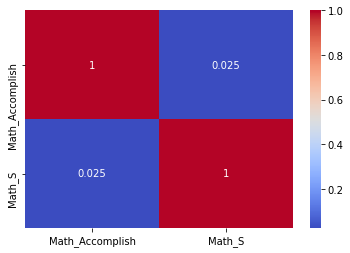

In [781]:
sns.heatmap(res[['Math_Accomplish','Math_S']].corr(),cmap='coolwarm',annot=True)

### answer: no, there isn't a clear connection

---
### Who did better?  Who has better memory quality score ? 
### Academic students or new high school graduated ?

In [782]:
res['Is_Academic']=res['Is_Academic'].apply(lambda x : 'Not Academic' if pd.isnull(x) else 'Academic')
res['Is_Academic'].sample(3)

71    Not Academic
29    Not Academic
18        Academic
Name: Is_Academic, dtype: object

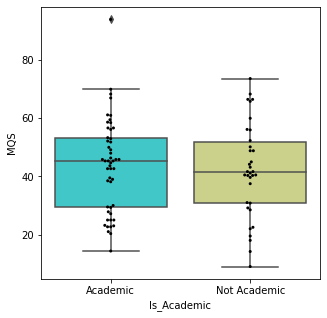

In [794]:
fig = plt.figure(figsize=(5,5))
sns.boxplot(x="Is_Academic", y="MQS", data=res,palette='rainbow')
sns.swarmplot(x="Is_Academic", y="MQS", data=res,color='black',size=3)

### answer: it is pretty close, but it seems like the mean for the academic students group is a little bit higher
### and with less variance

---

### Considering the time that passed since the last test, what can we infer?

In [798]:
res.groupby(by='Last_Test')

In [828]:
by_last_test=res.groupby(by='Last_Test').mean()[['Civil_S','Lit_1_S','Lit_2_S','His_S','Math_S','MQS']]
by_last_test=by_last_test.loc[['3 month - 1 year','1-3','3-5','5-10']]
by_last_test

,Civil_S,Lit_1_S,Lit_2_S,His_S,Math_S,MQS
Last_Test,,,,,,
3 month - 1 year,21.428571,40.000000,17.142857,35.714286,77.142857,40.142857
1-3,37.356322,51.379310,38.965517,33.333333,54.482759,42.275862
3-5,51.666667,45.000000,42.000000,38.333333,78.000000,52.800000
5-10,33.333333,32.894737,19.473684,37.719298,70.526316,41.605263


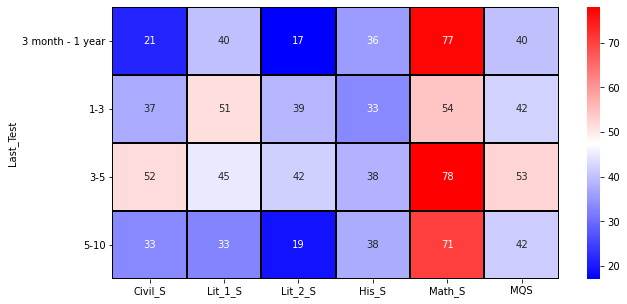

In [839]:
fig = plt.figure(figsize=(10,5))
sns.heatmap(by_last_test,cmap='bwr',linecolor='black',linewidths=1,annot=True)

    from 3 month to 1 year : higher chance to have a good MQS in Math_Score, but the lowest Memory Quality Score
    
    from 1 year to 3 years : a better chance remembering also the non-mathematical topics, but decrease in the mathematical topics.
    
    from 3 years to 5 years : a significant improvement in the chance of rememering non-mathematical topics. and also the highest Math_Score and Memory Quality Score
    
    from 5 years to 10 years : a minor decrease in all measurements. 

In [850]:
res.columns

Index(['Age_Range', 'All Tests', 'Last_Test', 'Is_Academic', 'Intensity',
       'English_Accomplish', 'Hebrew_Accomplish', 'Math_Accomplish', 'Civil',
       'Lit_1', 'Lit_2', 'History', 'Math_Level', 'Math_Level3',
       'Math_Level4_5', 'Civil_S', 'Lit_1_S', 'Lit_2_S', 'His_N', 'His_S',
       'Math_3_S', 'Math_4_5_S', 'Math_S', 'MQS'],
      dtype='object')

In [869]:
civil_corr=pd.DataFrame(res.corr()['Civil']).T
civil_corr[civil_corr>=0.3]

,Intensity,English_Accomplish,Hebrew_Accomplish,Math_Accomplish,Civil,Lit_1,Lit_2,Math_Level,Math_Level3,Math_Level4_5,Civil_S,Lit_1_S,Lit_2_S,His_N,His_S,Math_3_S,Math_4_5_S,Math_S,MQS
Civil,NaN,NaN,0.334406,NaN,1.0,NaN,NaN,0.310108,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.680248


In [872]:
civil_corr[['Hebrew_Accomplish','Math_Level','MQS']]

,Hebrew_Accomplish,Math_Level,MQS
Civil,0.334406,0.310108,0.680248


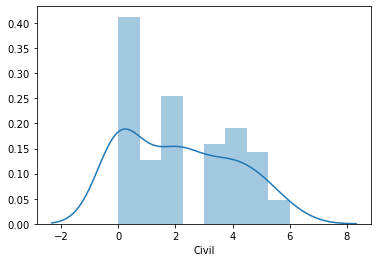

In [875]:
sns.distplot(res['Civil'],bins=8)


(5.0, 70.0)

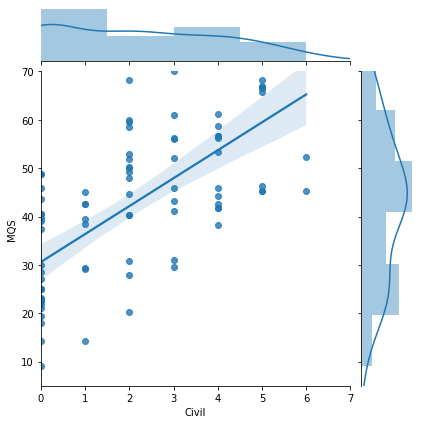

In [883]:
g=sns.jointplot(x='Civil',y='MQS',data=res,kind='reg')
plt.xlim(0, 7)
plt.ylim(5, 70)

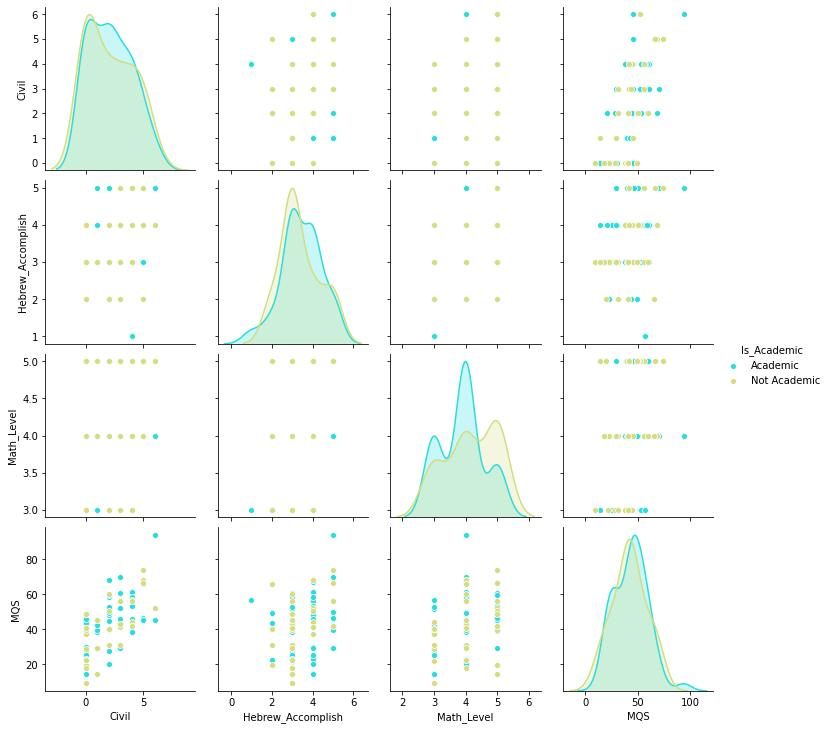

In [886]:
sns.pairplot(res[['Civil','Hebrew_Accomplish','Math_Level','MQS','Is_Academic']],hue='Is_Academic',palette='rainbow')

### we can see that there is a relation between the ability to remember topics in Civil studies and between  MQS Score,

### also those who has shown good memory in civil, also had the potential to have good sense of accomplishment in hebrew and to be in a better group in Math (4 units or 5 units instead of 3)

# 5. Statistical Inference

---
We have this question we need to answer:
### Is there a difference in the Memory Quality Score (MQS) 
### between new high school graduates and academic students (ages 23-28)   ????
 ---
 
 Let's do it !


In [889]:
#Academic students Group
A=responses.loc[(responses['Age_Range']=='23-28'),['MQS']]

#New High School Graduates Group
Y=responses.loc[(responses['Age_Range']=='18-20'),['MQS']]

In [890]:
pd.DataFrame(A.describe()).T

,count,mean,std,min,25%,50%,75%,max
MQS,41.0,43.239837,16.445324,14.333333,27.833333,45.333333,53.0,94.0


In [891]:
pd.DataFrame(Y.describe()).T

,count,mean,std,min,25%,50%,75%,max
MQS,43.0,42.864341,15.863849,9.0,30.916667,41.666667,54.166667,73.666667


### We can see that the values are close
    Sample_Size(A)=41             Sample_Size(Y)=43
    Mean(A) = 43.24               Mean(Y) = 42.86
    STD(A) = 16.44                  STD(Y) = 15.86

### Perhaps, just maybe, the quality of memory could be the same after all ?
---
   

## Let's define the hypothesis:

#### H0: mu(A) == mu(Y)
#### H1: mu(A) != mu(Y)
#### assuming equal variance
#### two tailed, two sampled, unequal variance  T TEST
#### Alpha= 0.05

In [892]:
import scipy.stats as stats
from scipy.stats import t
from scipy.stats import ttest_ind

In [893]:
t

In [894]:
ttest_ind

<function scipy.stats.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')>

In [895]:
def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = data1.mean(),data2.mean()
    # calculate standard errors
    se1, se2 = data1.sem(), data2.sem()
    # standard error on the difference between the samples
    sed = np.sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p[0]

In [896]:
Alpha=0.05

In [897]:
[t_stat, df, critical_value, p_value]=independent_ttest(A,Y,Alpha)

In [898]:
if p_value<=Alpha:
    print("We Reject H0, The MQS of those two populations are probably different ")
else:
    print("We cannot reject H0, therefore the MQS is probably the same for those twho populations")

We cannot reject H0, therefore the MQS is probably the same for those twho populations


In [899]:
## check

In [900]:
A_dist=t.rvs(len(A['MQS'])-1, loc=A['MQS'].mean(), scale=A['MQS'].std(), size=len(A['MQS']))
A_dist

array([17.93225897, 35.42037415, 39.58288441, 26.35833816, 23.39986305,
       60.91466865, 26.70242039, 78.97132328, 23.96897092, 22.17856674,
       31.82951413,  1.97392458, 56.95335256, 22.04292187, 60.58589587,
       46.66651627, 22.41538502, 42.35142648, 46.631632  , 59.71630002,
       76.31190669, 68.67396853, 34.49846931, 40.27714086, 70.15865065,
       33.07682215, 74.71493813, 51.35328361, 74.3239929 , 51.394542  ,
       36.63658844, 39.86679517, 48.5789053 , 26.84117314, 41.16678981,
       22.82376502, 45.06939416, 36.16466287, 70.24522393, 38.11357055,
       43.70619205])

In [901]:
Y_dist=t.rvs(len(Y['MQS'])-1, loc=Y['MQS'].mean(), scale=Y['MQS'].std(), size=len(Y['MQS']))
Y_dist

array([32.12345007, 37.01556959, 42.64526288, 33.72042386, 40.91029773,
       72.08030675, 30.22110211, 46.48068923, 35.89353508, 34.75072945,
       45.07433155, 12.77681278, 50.59500756, 42.33600531, 62.33651606,
       51.86058641, 53.44303611, 49.42510423, 33.52166654, 49.70937559,
       39.89060327, 33.71523145, 58.71027238,  5.43764573, 82.85944217,
       70.19117749, 42.77881573, 56.9682516 , 50.21276412, 46.92763994,
       59.35247579, 57.83498836, 26.08629891, 32.21639439, 46.54863628,
       36.95181208, 16.50556361, 40.78194732, 39.18295735,  7.22647254,
       26.78450894, 53.00086127, 46.86599648])

In [902]:
rv = t(df=len(Y['MQS'])-1, loc=Y['MQS'].mean(), scale=Y['MQS'].std())
rv

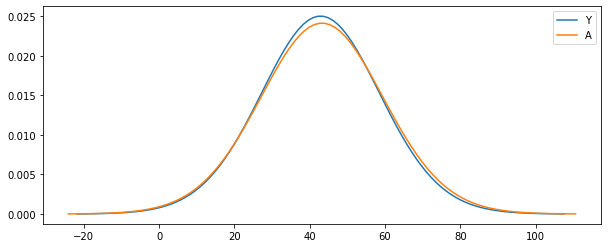

In [903]:



rv_A = t(df=len(A['MQS'])-1, loc=A['MQS'].mean(), scale=A['MQS'].std())
a = np.linspace(rv_A.ppf(0.0001), rv_A.ppf(0.9999), 100)
b = rv_A.pdf(a) 


rv_Y = t(df=len(Y['MQS'])-1, loc=Y['MQS'].mean(), scale=Y['MQS'].std())
x = np.linspace(rv_Y.ppf(0.0001), rv_Y.ppf(0.9999), 100)
y = rv_Y.pdf(x) 

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x,y,label='Y')
ax.plot(a,b,label='A')

plt.legend()

# it is clear that the means of those two groups are very close.
# inferring that the Expeted values for their MQS is also the same.